In [1]:
%matplotlib inline
import torch
import torchvision
import torch.nn as nn
import pandas as pd
import numpy as np
from tqdm import tqdm
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

D:\miniconda3\envs\cnn\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 定义LeNet模型
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=16 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
        
    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = x.reshape(-1, 16 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
train_dataset = datasets.MNIST(root='../data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='../data', train=False, transform=transforms.ToTensor())

In [4]:
# 定义数据加载器
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)

In [5]:
model = LeNet5()
loss_fun = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [6]:
model.cuda()
loss_fun.cuda()

CrossEntropyLoss()

In [7]:
train_loss = []
test_acc = []

In [8]:
# 训练模型
model.train()
for epoch in tqdm(range(10)):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        loss = loss_fun(outputs, labels)
        train_loss.append(loss.data.cpu().numpy())
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, 10, i+1, len(train_loader), loss.item()))
    
    # 每个epoch进行一次eval
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.cuda()
            labels = labels.cuda()
            outputs = model(images)
            # torch.max(input, dim, max=None, max_indices=None) -> (Tensor, LongTensor)
            _, predicted = torch.max(outputs.data, 1) # 返回行最大值，和对应的行标
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            test_acc.append(100*correct/total)
        print('Epoch [{}/{}], Test Accuracy:{:.2f}%'.format(epoch+1, 10, 100*correct/total))

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Step [100/938], Loss: 0.6538
Epoch [1/10], Step [200/938], Loss: 0.4641
Epoch [1/10], Step [300/938], Loss: 0.2524
Epoch [1/10], Step [400/938], Loss: 0.2822
Epoch [1/10], Step [500/938], Loss: 0.2183
Epoch [1/10], Step [600/938], Loss: 0.0867
Epoch [1/10], Step [700/938], Loss: 0.1884
Epoch [1/10], Step [800/938], Loss: 0.0745
Epoch [1/10], Step [900/938], Loss: 0.2359


 10%|████████▎                                                                          | 1/10 [00:07<01:08,  7.61s/it]

Epoch [1/10], Test Accuracy:96.32%
Epoch [2/10], Step [100/938], Loss: 0.1328
Epoch [2/10], Step [200/938], Loss: 0.0720
Epoch [2/10], Step [300/938], Loss: 0.0426
Epoch [2/10], Step [400/938], Loss: 0.0964
Epoch [2/10], Step [500/938], Loss: 0.0235
Epoch [2/10], Step [600/938], Loss: 0.0559
Epoch [2/10], Step [700/938], Loss: 0.0991
Epoch [2/10], Step [800/938], Loss: 0.1442
Epoch [2/10], Step [900/938], Loss: 0.1439


 20%|████████████████▌                                                                  | 2/10 [00:16<01:06,  8.27s/it]

Epoch [2/10], Test Accuracy:97.38%
Epoch [3/10], Step [100/938], Loss: 0.0309
Epoch [3/10], Step [200/938], Loss: 0.0105
Epoch [3/10], Step [300/938], Loss: 0.0211
Epoch [3/10], Step [400/938], Loss: 0.1622
Epoch [3/10], Step [500/938], Loss: 0.1114
Epoch [3/10], Step [600/938], Loss: 0.2152
Epoch [3/10], Step [700/938], Loss: 0.0136
Epoch [3/10], Step [800/938], Loss: 0.0504
Epoch [3/10], Step [900/938], Loss: 0.0890


 30%|████████████████████████▉                                                          | 3/10 [00:24<00:58,  8.40s/it]

Epoch [3/10], Test Accuracy:98.33%
Epoch [4/10], Step [100/938], Loss: 0.1128
Epoch [4/10], Step [200/938], Loss: 0.0112
Epoch [4/10], Step [300/938], Loss: 0.0981
Epoch [4/10], Step [400/938], Loss: 0.1539
Epoch [4/10], Step [500/938], Loss: 0.0496
Epoch [4/10], Step [600/938], Loss: 0.0069
Epoch [4/10], Step [700/938], Loss: 0.0159
Epoch [4/10], Step [800/938], Loss: 0.1187
Epoch [4/10], Step [900/938], Loss: 0.0422


 40%|█████████████████████████████████▏                                                 | 4/10 [00:33<00:51,  8.52s/it]

Epoch [4/10], Test Accuracy:98.03%
Epoch [5/10], Step [100/938], Loss: 0.0353
Epoch [5/10], Step [200/938], Loss: 0.0300
Epoch [5/10], Step [300/938], Loss: 0.0137
Epoch [5/10], Step [400/938], Loss: 0.0254
Epoch [5/10], Step [500/938], Loss: 0.0277
Epoch [5/10], Step [600/938], Loss: 0.0163
Epoch [5/10], Step [700/938], Loss: 0.0215
Epoch [5/10], Step [800/938], Loss: 0.0618
Epoch [5/10], Step [900/938], Loss: 0.1879


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:42<00:43,  8.67s/it]

Epoch [5/10], Test Accuracy:98.74%
Epoch [6/10], Step [100/938], Loss: 0.0356
Epoch [6/10], Step [200/938], Loss: 0.0137
Epoch [6/10], Step [300/938], Loss: 0.0061
Epoch [6/10], Step [400/938], Loss: 0.0395
Epoch [6/10], Step [500/938], Loss: 0.0733
Epoch [6/10], Step [600/938], Loss: 0.0284
Epoch [6/10], Step [700/938], Loss: 0.0014
Epoch [6/10], Step [800/938], Loss: 0.0655
Epoch [6/10], Step [900/938], Loss: 0.0091


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:51<00:34,  8.73s/it]

Epoch [6/10], Test Accuracy:98.45%
Epoch [7/10], Step [100/938], Loss: 0.0014
Epoch [7/10], Step [200/938], Loss: 0.0267
Epoch [7/10], Step [300/938], Loss: 0.1197
Epoch [7/10], Step [400/938], Loss: 0.0653
Epoch [7/10], Step [500/938], Loss: 0.0153
Epoch [7/10], Step [600/938], Loss: 0.0391
Epoch [7/10], Step [700/938], Loss: 0.0488
Epoch [7/10], Step [800/938], Loss: 0.0414
Epoch [7/10], Step [900/938], Loss: 0.0141


 70%|██████████████████████████████████████████████████████████                         | 7/10 [01:00<00:26,  8.95s/it]

Epoch [7/10], Test Accuracy:98.56%
Epoch [8/10], Step [100/938], Loss: 0.0023
Epoch [8/10], Step [200/938], Loss: 0.0501
Epoch [8/10], Step [300/938], Loss: 0.0009
Epoch [8/10], Step [400/938], Loss: 0.0031
Epoch [8/10], Step [500/938], Loss: 0.0060
Epoch [8/10], Step [600/938], Loss: 0.0130
Epoch [8/10], Step [700/938], Loss: 0.0270
Epoch [8/10], Step [800/938], Loss: 0.0566
Epoch [8/10], Step [900/938], Loss: 0.0366


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [01:10<00:18,  9.07s/it]

Epoch [8/10], Test Accuracy:98.74%
Epoch [9/10], Step [100/938], Loss: 0.0076
Epoch [9/10], Step [200/938], Loss: 0.0073
Epoch [9/10], Step [300/938], Loss: 0.0041
Epoch [9/10], Step [400/938], Loss: 0.0148
Epoch [9/10], Step [500/938], Loss: 0.0009
Epoch [9/10], Step [600/938], Loss: 0.0217
Epoch [9/10], Step [700/938], Loss: 0.0750
Epoch [9/10], Step [800/938], Loss: 0.0114
Epoch [9/10], Step [900/938], Loss: 0.0046


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [01:18<00:08,  8.94s/it]

Epoch [9/10], Test Accuracy:98.86%
Epoch [10/10], Step [100/938], Loss: 0.0044
Epoch [10/10], Step [200/938], Loss: 0.0611
Epoch [10/10], Step [300/938], Loss: 0.0011
Epoch [10/10], Step [400/938], Loss: 0.0427
Epoch [10/10], Step [500/938], Loss: 0.0008
Epoch [10/10], Step [600/938], Loss: 0.0283
Epoch [10/10], Step [700/938], Loss: 0.0364
Epoch [10/10], Step [800/938], Loss: 0.0113
Epoch [10/10], Step [900/938], Loss: 0.0483


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:27<00:00,  8.73s/it]

Epoch [10/10], Test Accuracy:98.94%


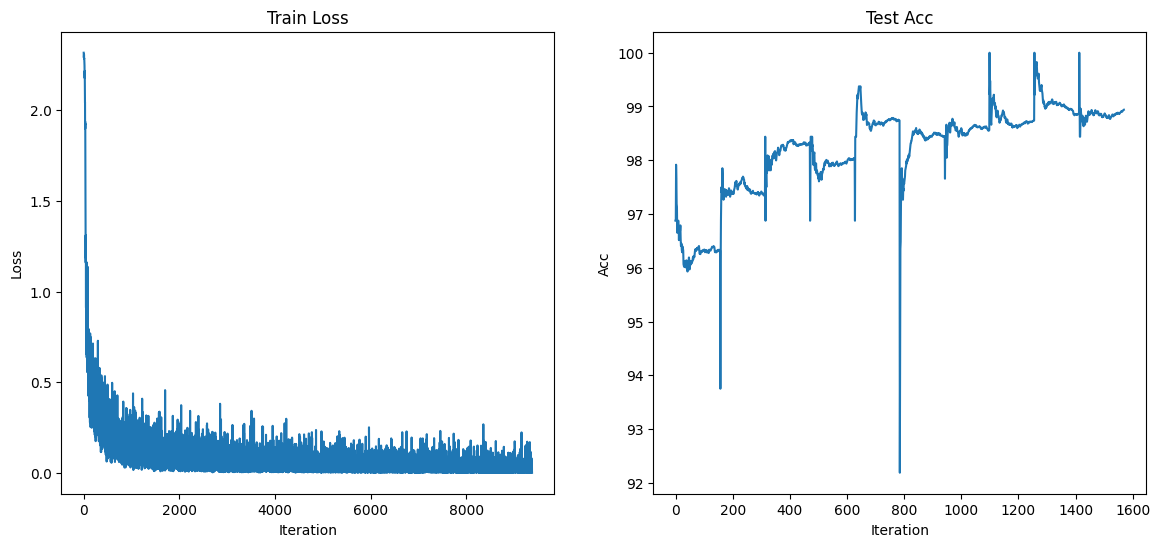

In [10]:
fig = plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 2, 1)
ax1.set_title('Train Loss')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')
ax1.plot(train_loss)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('Test Acc')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Acc')
ax2.plot(test_acc)